In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
from sklearn.cluster import KMeans

In [ ]:
Nacto =pd.read_csv("/content/Quote-Equity-NATCOPHARM-EQ-29-03-2023-to-29-03-2024.csv")
Nacto

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Mar-2024,EQ,975.40,979.00,945.00,973.50,952.95,952.05,959.51,"1,108.35",530.55,"4,95,457","47,53,94,204.30","25,513"
1,27-Mar-2024,EQ,964.15,995.40,962.00,958.50,967.00,973.50,977.57,"1,108.35",530.55,"9,50,812","92,94,88,389.95","46,521"
2,26-Mar-2024,EQ,955.00,973.00,952.20,952.05,955.00,958.50,961.19,"1,108.35",530.55,"5,42,290","52,12,44,581.80","25,144"
3,22-Mar-2024,EQ,957.00,966.50,949.00,952.75,950.00,952.05,955.98,"1,108.35",530.55,"3,76,364","35,97,96,511.80","27,196"
4,21-Mar-2024,EQ,963.00,978.05,949.50,950.05,950.00,952.75,960.13,"1,108.35",530.55,"6,96,569","66,87,94,956.75","29,406"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,06-Apr-2023,EQ,580.85,580.85,573.25,577.90,577.00,578.20,575.53,848.40,502.00,"4,08,570","23,51,43,046.85","6,760"
244,05-Apr-2023,EQ,580.90,583.00,572.10,580.90,576.75,577.90,575.59,848.40,502.00,"3,20,782","18,46,39,410.50","10,046"
245,03-Apr-2023,EQ,569.80,583.15,564.65,563.35,579.00,580.90,577.17,848.40,502.00,"2,52,441","14,57,02,148.05","13,507"
246,31-Mar-2023,EQ,552.35,570.80,550.30,555.70,563.80,563.35,560.53,848.40,502.00,"4,31,113","24,16,53,160.05","15,989"


In [ ]:
Nacto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           248 non-null    object 
 1   series         248 non-null    object 
 2   OPEN           248 non-null    object 
 3   HIGH           248 non-null    object 
 4   LOW            248 non-null    object 
 5   PREV. CLOSE    248 non-null    object 
 6   ltp            248 non-null    object 
 7   close          248 non-null    object 
 8   vwap           248 non-null    object 
 9   52W H          248 non-null    object 
 10  52W L          248 non-null    float64
 11  VOLUME         248 non-null    object 
 12  VALUE          248 non-null    object 
 13  No of trades   248 non-null    object 
dtypes: float64(1), object(13)
memory usage: 27.2+ KB


In [ ]:
Nacto.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:
Nacto.set_index('Date ', inplace=True)
Nacto

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
28-Mar-2024,EQ,975.40,979.00,945.00,973.50,952.95,952.05,959.51,"1,108.35",530.55,"4,95,457","47,53,94,204.30","25,513"
27-Mar-2024,EQ,964.15,995.40,962.00,958.50,967.00,973.50,977.57,"1,108.35",530.55,"9,50,812","92,94,88,389.95","46,521"
26-Mar-2024,EQ,955.00,973.00,952.20,952.05,955.00,958.50,961.19,"1,108.35",530.55,"5,42,290","52,12,44,581.80","25,144"
22-Mar-2024,EQ,957.00,966.50,949.00,952.75,950.00,952.05,955.98,"1,108.35",530.55,"3,76,364","35,97,96,511.80","27,196"
21-Mar-2024,EQ,963.00,978.05,949.50,950.05,950.00,952.75,960.13,"1,108.35",530.55,"6,96,569","66,87,94,956.75","29,406"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
06-Apr-2023,EQ,580.85,580.85,573.25,577.90,577.00,578.20,575.53,848.40,502.00,"4,08,570","23,51,43,046.85","6,760"
05-Apr-2023,EQ,580.90,583.00,572.10,580.90,576.75,577.90,575.59,848.40,502.00,"3,20,782","18,46,39,410.50","10,046"
03-Apr-2023,EQ,569.80,583.15,564.65,563.35,579.00,580.90,577.17,848.40,502.00,"2,52,441","14,57,02,148.05","13,507"


In [ ]:
Nacto.drop(["series "],axis=1, inplace=True)

In [ ]:
Nacto

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
28-Mar-2024,975.40,979.00,945.00,973.50,952.95,952.05,959.51,"1,108.35",530.55,"4,95,457","47,53,94,204.30","25,513"
27-Mar-2024,964.15,995.40,962.00,958.50,967.00,973.50,977.57,"1,108.35",530.55,"9,50,812","92,94,88,389.95","46,521"
26-Mar-2024,955.00,973.00,952.20,952.05,955.00,958.50,961.19,"1,108.35",530.55,"5,42,290","52,12,44,581.80","25,144"
22-Mar-2024,957.00,966.50,949.00,952.75,950.00,952.05,955.98,"1,108.35",530.55,"3,76,364","35,97,96,511.80","27,196"
21-Mar-2024,963.00,978.05,949.50,950.05,950.00,952.75,960.13,"1,108.35",530.55,"6,96,569","66,87,94,956.75","29,406"
...,...,...,...,...,...,...,...,...,...,...,...,...
06-Apr-2023,580.85,580.85,573.25,577.90,577.00,578.20,575.53,848.40,502.00,"4,08,570","23,51,43,046.85","6,760"
05-Apr-2023,580.90,583.00,572.10,580.90,576.75,577.90,575.59,848.40,502.00,"3,20,782","18,46,39,410.50","10,046"
03-Apr-2023,569.80,583.15,564.65,563.35,579.00,580.90,577.17,848.40,502.00,"2,52,441","14,57,02,148.05","13,507"


In [ ]:
for i in Nacto.columns:
  if i=='52W L ':
    pass
  else:
    Nacto[i]=Nacto[i].apply(lambda j: float(j.replace(",",'')))

In [ ]:
Nacto

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
28-Mar-2024,975.40,979.00,945.00,973.50,952.95,952.05,959.51,1108.35,530.55,495457.0,4.753942e+08,25513.0
27-Mar-2024,964.15,995.40,962.00,958.50,967.00,973.50,977.57,1108.35,530.55,950812.0,9.294884e+08,46521.0
26-Mar-2024,955.00,973.00,952.20,952.05,955.00,958.50,961.19,1108.35,530.55,542290.0,5.212446e+08,25144.0
22-Mar-2024,957.00,966.50,949.00,952.75,950.00,952.05,955.98,1108.35,530.55,376364.0,3.597965e+08,27196.0
21-Mar-2024,963.00,978.05,949.50,950.05,950.00,952.75,960.13,1108.35,530.55,696569.0,6.687950e+08,29406.0
...,...,...,...,...,...,...,...,...,...,...,...,...
06-Apr-2023,580.85,580.85,573.25,577.90,577.00,578.20,575.53,848.40,502.00,408570.0,2.351430e+08,6760.0
05-Apr-2023,580.90,583.00,572.10,580.90,576.75,577.90,575.59,848.40,502.00,320782.0,1.846394e+08,10046.0
03-Apr-2023,569.80,583.15,564.65,563.35,579.00,580.90,577.17,848.40,502.00,252441.0,1.457021e+08,13507.0


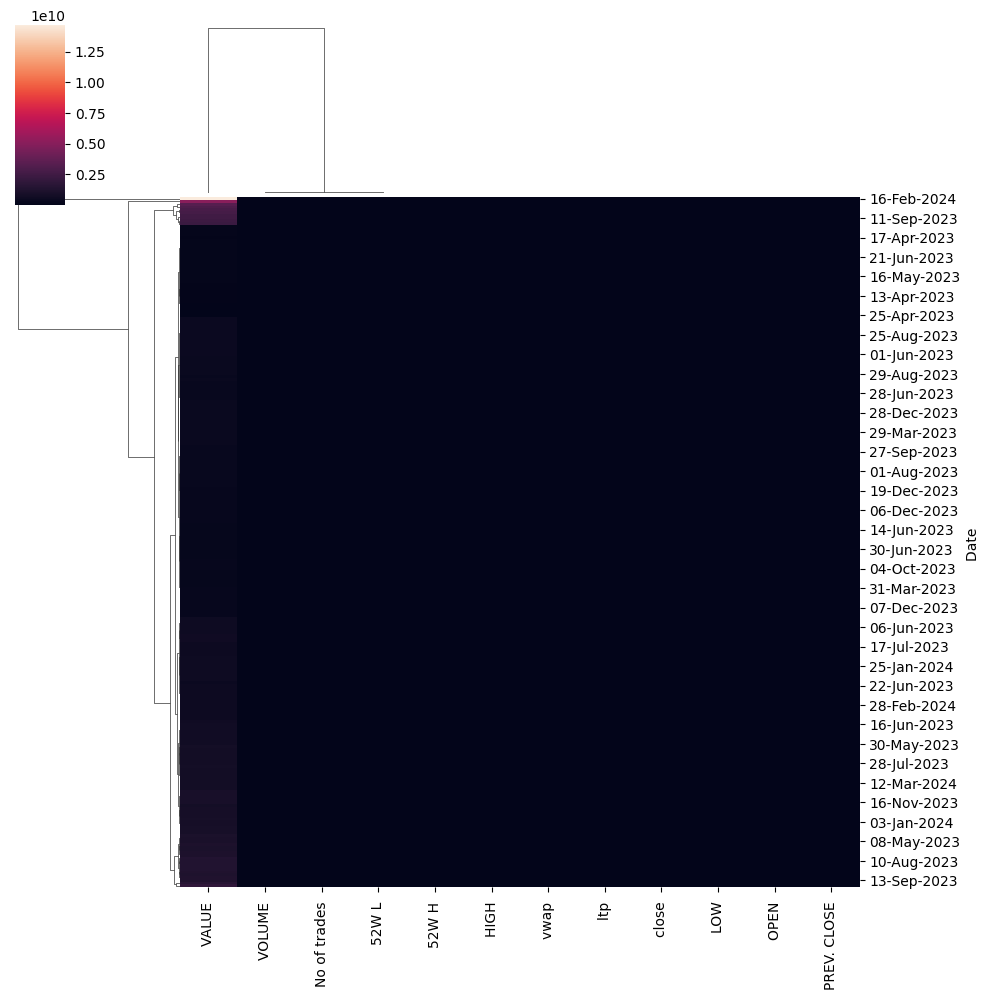

In [ ]:
sns.clustermap(Nacto)
plt.show()

In [ ]:
Nacto_wcss=[]
for w in range(1,100):
  model=KMeans(w)
  model.fit(Nacto)
  Nacto_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
Nacto_wcss

[2.8116233951897086e+20,
 8.278307647875128e+19,
 2.8518987722712367e+19,
 1.3332638842441677e+19,
 7.898056192165089e+18,
 4.624391559186899e+18,
 3.0005407943833477e+18,
 2.254043407796841e+18,
 1.6986527753492063e+18,
 1.3256955254617277e+18,
 9.801979412608169e+17,
 7.823626493386011e+17,
 6.619341178828366e+17,
 5.186656759493153e+17,
 4.431244713883036e+17,
 3.880896575451319e+17,
 3.4158803888058074e+17,
 2.839848104851894e+17,
 2.495615099154734e+17,
 2.13125960628077e+17,
 1.8525725641546867e+17,
 1.5030890003245965e+17,
 1.309000865151598e+17,
 1.103786153026532e+17,
 9.566765549060693e+16,
 8.786976904713914e+16,
 8.172902939879533e+16,
 7.25430775518539e+16,
 6.909921123299992e+16,
 5.929710731660914e+16,
 5.467280576418898e+16,
 4.7293416731366e+16,
 4.290972544184958e+16,
 3.814997383095727e+16,
 3.46144561941944e+16,
 3.2978344817536844e+16,
 2.8653286287928516e+16,
 2.7664745515338816e+16,
 2.544727352203053e+16,
 2.355477162075437e+16,
 2.2082530234033276e+16,
 2.11237

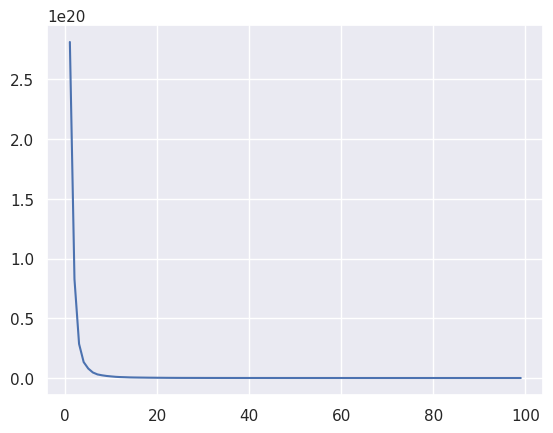

In [ ]:
sns.set()
plt.plot(range(1,100),Nacto_wcss)
plt.show()

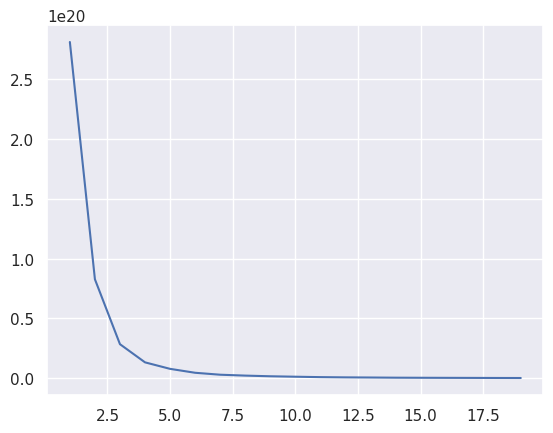

In [ ]:
sns.set()
plt.plot(range(1,20),Nacto_wcss[:19])
plt.show()

In [ ]:
model=KMeans(10)
model.fit(Nacto)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
identify_cluster=model.fit_predict(Nacto)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Nacto["cluster"]=identify_cluster
Nacto

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
28-Mar-2024,975.40,979.00,945.00,973.50,952.95,952.05,959.51,1108.35,530.55,495457.0,4.753942e+08,25513.0,2
27-Mar-2024,964.15,995.40,962.00,958.50,967.00,973.50,977.57,1108.35,530.55,950812.0,9.294884e+08,46521.0,6
26-Mar-2024,955.00,973.00,952.20,952.05,955.00,958.50,961.19,1108.35,530.55,542290.0,5.212446e+08,25144.0,2
22-Mar-2024,957.00,966.50,949.00,952.75,950.00,952.05,955.98,1108.35,530.55,376364.0,3.597965e+08,27196.0,9
21-Mar-2024,963.00,978.05,949.50,950.05,950.00,952.75,960.13,1108.35,530.55,696569.0,6.687950e+08,29406.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
06-Apr-2023,580.85,580.85,573.25,577.90,577.00,578.20,575.53,848.40,502.00,408570.0,2.351430e+08,6760.0,4
05-Apr-2023,580.90,583.00,572.10,580.90,576.75,577.90,575.59,848.40,502.00,320782.0,1.846394e+08,10046.0,4
03-Apr-2023,569.80,583.15,564.65,563.35,579.00,580.90,577.17,848.40,502.00,252441.0,1.457021e+08,13507.0,4


In [ ]:
Nacto["cluster"].value_counts()

9    76
4    56
2    50
6    37
7    17
5     6
8     2
0     2
3     1
1     1
Name: cluster, dtype: int64

In [ ]:
Nacto[Nacto.cluster==5]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
06-Mar-2024,980.85,1030.0,975.00,982.85,1018.0,1020.20,1011.25,1108.35,520.25,2764993.0,2.796098e+09,106014.0,5
14-Feb-2024,855.00,909.0,848.05,856.90,886.0,884.80,888.39,928.00,520.25,2675111.0,2.376552e+09,89753.0,5
15-Nov-2023,829.90,829.9,754.55,794.25,759.0,758.65,778.14,928.00,502.00,3211304.0,2.498854e+09,92482.0,5
11-Sep-2023,863.00,865.0,811.00,881.75,811.5,813.30,834.33,928.00,502.00,3005988.0,2.507976e+09,97130.0,5
09-Aug-2023,883.90,916.6,882.60,875.85,885.0,893.65,897.15,916.60,502.00,2997852.0,2.689534e+09,57048.0,5
26-Jun-2023,680.90,705.0,678.10,674.00,695.0,695.45,695.46,778.90,502.00,3262483.0,2.268938e+09,94400.0,5


In [ ]:
Nacto[Nacto.cluster==1]

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,cluster
Date,,,,,,,,,,,,,
16-Feb-2024,891.0,1051.0,889.85,887.1,1015.6,1026.5,1002.42,1051.0,520.25,14634622.0,1.466998e+10,307221.0,1
